In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
ds = pd.read_csv('Ads_CTR_Optimisation.csv')
ds.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [11]:
# total number of ads
d = 10
# number of times the ad i was selected
numbers_of_selection = [0] * d
# sum of number of times ad i was correctly selected
sums_of_rewards = [0] * d
# total number of rounds
N = 10000
# the ads algorithm will select
ads_selected = []
# total reward
total_reward = 0

# for all rounds
for n in range(0, N):
    max_upper_bound = 0
    ad = 0
    # for all ads
    for i in range(0, d):
        if numbers_of_selection[i] > 0:
            average_reward = sums_of_rewards[i] / float(numbers_of_selection[i])
            delta_i = math.sqrt((3/float(2)) * (math.log(n + 1) / float(numbers_of_selection[i])))
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selection[ad] = numbers_of_selection[ad] + 1
    reward = ds.values[n, ad]
    sums_of_rewards[ad] += reward
    total_reward += reward

In [12]:
total_reward

2178

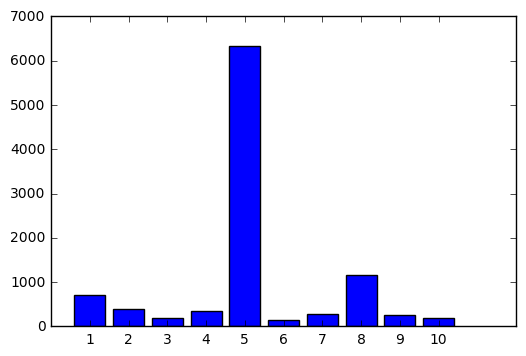

In [80]:
plt.bar(range(1, 11), numbers_of_selection, align="center")
plt.xticks(range(1, 11))
plt.show()